In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from getpass import getuser

# Get the current user's name
user = getuser()

# Path to the dataset
data_path = rf'C:\Users\{user}\Documents\GitHub\dream-team-fpl-prediction\data\final_ds\ds_gk.xlsx'

# Read the dataset
df = pd.read_excel(data_path)

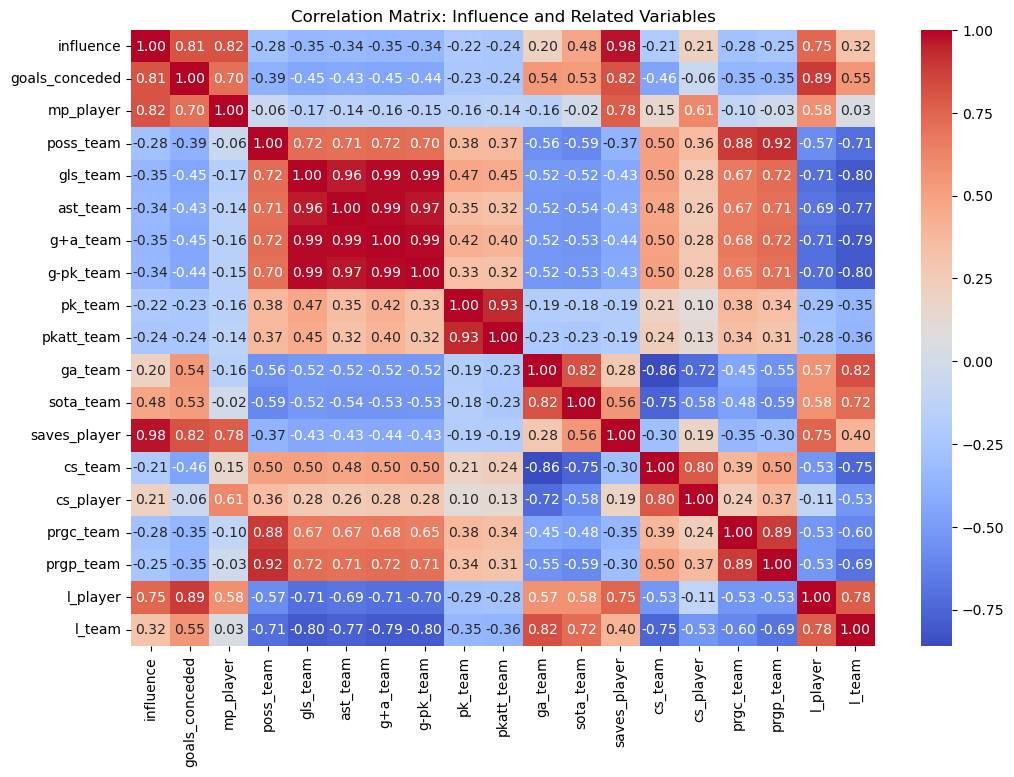

In [13]:
# Select relevant columns for analysis
columns_of_interest = [
    'influence', 'goals_conceded','mp_player',
    'poss_team', 'gls_team', 'ast_team', 'g+a_team', 'g-pk_team', 'pk_team','pkatt_team',
    'ga_team', 'sota_team', 'saves_player','cs_team', 'cs_player', 'prgc_team', 'prgp_team', 'l_player', 'l_team',
]

# Create a subset of the dataframe with these columns
df_subset = df[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = df_subset.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Influence and Related Variables')
plt.show()



In [14]:
# Filter for the last two seasons
# df = df[df['season'].isin(['2022-2023','2023-2024'])].copy()

# 1. Shot-Stopping Efficiency Score (SES)
df['SES'] = df['save_prct_player'] + 0.2 * df['save_prct_pk_player']

# 2. Clean Sheet Rate (CSR)
df['CSR'] = df['cs_player'] / df['90s_player']

# 3. Goals Saved Rate (GSR), avoid divide-by-zero
df['GSR'] = 1 - (df['ga_player'] / df['sota_player'].replace(0, pd.NA))

# 4. Normalize each metric (Min-Max Scaling)
for col in ['SES', 'CSR', 'GSR']:
    min_val = df[col].min()
    max_val = df[col].max()
    df[f'{col}_scaled'] = (df[col] - min_val) / (max_val - min_val)

# 5. Composite Goalkeeper Score (GKS)
df['GKS'] = (
    0.4 * df['SES_scaled'] +
    0.3 * df['CSR_scaled'] +
    0.3 * df['GSR_scaled']
)

# 6. Sort and display top-performing goalkeepers
metrics_summary = df[['player', 'season', 'SES', 'CSR', 'GSR', 'GKS']].sort_values(by='GKS', ascending=False)
print(metrics_summary.head(15))  # Show top 15 by composite score


               player     season    SES       CSR       GSR       GKS
73        Hugo Lloris  2019-2020  87.46  0.298507  0.787879  0.825564
4         Joel Robles  2016-2017  77.50  0.518135  0.750000  0.798852
56        Hugo Lloris  2018-2019  84.90  0.363636  0.746154  0.788051
71     Dean Henderson  2019-2020  85.00  0.361111  0.742188  0.783301
23          Nick Pope  2017-2018  83.40  0.346821  0.763514  0.781253
127         Nick Pope  2022-2023  84.60  0.386740  0.728814  0.778621
15        Hugo Lloris  2016-2017  77.20  0.449102  0.762376  0.769969
30       Loris Karius  2017-2018  79.96  0.526316  0.688889  0.762626
81      Edouard Mendy  2020-2021  78.26  0.524590  0.691358  0.745657
140    Arijanet Muric  2023-2024  90.80  0.000000  0.794872  0.700000
80          Nick Pope  2020-2021  77.20  0.343750  0.751678  0.698014
1          Tom Heaton  2016-2017  80.70  0.285714  0.746032  0.697219
33     Fraser Forster  2017-2018  89.10  0.200000  0.690722  0.679381
2    Thibaut Courtoi